[*소득 예측 AI 해커톤*](https://dacon.io/competitions/official/236230/overview/description)

    Best: 539.7530220083 (Catboost)

## Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [ ]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

display(train.head(3))
display(test.head(3))

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median


- ID : 학습 데이터 고유 ID
- Age
- Gender
- Education_Status
- Employment_Status
- Working_Week (Yearly)
- Industry_Status
- Occupation_Status
- Race
- Hispanic_Origin
- Martial_Status
- Household_Status
- Household_summary
- Citizenship
- Birth_Country: 국적
- Birth_Country (Father): 국적 (부)
- Birth_Country (Mother): 국적 (모)
- Tax_Status
- Gains: 소득
- Losses: 손실
- Divdends: 배당
- Incom_Status: 최종 소득
- Income : 1시간 단위의 근로 소득

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,35.63250,17.994414,0.0,23.0,34.0,47.0,90.0
Working_Week (Yearly),20000.0,34.94305,22.254592,0.0,7.0,52.0,52.0,52.0
Gains,20000.0,383.12950,4144.247487,0.0,0.0,0.0,0.0,99999.0
Losses,20000.0,40.20215,279.182677,0.0,0.0,0.0,0.0,4356.0
Dividends,20000.0,123.45145,1206.949429,0.0,0.0,0.0,0.0,45000.0
Income,20000.0,554.56525,701.553155,0.0,0.0,500.0,875.0,9999.0


In [ ]:
train.describe(include="object").T

,count,unique,top,freq
ID,20000,20000,TRAIN_00000,1
Gender,20000,2,F,10472
Education_Status,20000,17,High graduate,6494
Employment_Status,20000,8,Children or Armed Forces,11142
Industry_Status,20000,24,Not in universe or children,4688
Occupation_Status,20000,15,Unknown,4688
Race,20000,5,White,16845
Hispanic_Origin,20000,10,All other,17769
Martial_Status,20000,7,Married,9554
Household_Status,20000,31,Householder,6087


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID                      10000 non-null  object  
 1   Age                     10000 non-null  int64   
 2   Gender                  10000 non-null  category
 3   Education_Status        10000 non-null  category
 4   Employment_Status       10000 non-null  category
 5   Working_Week (Yearly)   10000 non-null  int64   
 6   Industry_Status         10000 non-null  category
 7   Occupation_Status       10000 non-null  category
 8   Race                    10000 non-null  category
 9   Hispanic_Origin         10000 non-null  category
 10  Martial_Status          10000 non-null  category
 11  Household_Status        9999 non-null   category
 12  Household_Summary       10000 non-null  category
 13  Citizenship             10000 non-null  category
 14  Birth_Country          

### test 결측치 처리

In [ ]:
test[test['Household_Status'].isnull()].T

,2659
ID,TEST_2659
Age,20
Gender,F
Education_Status,College
Employment_Status,Children or Armed Forces
Working_Week (Yearly),0
Industry_Status,Not in universe or children
Occupation_Status,Unknown
Race,Black
Hispanic_Origin,All other


In [ ]:
test['Household_Status'].value_counts()

Householder                                                               3128
Spouse of householder                                                     2418
Child <18 never marr not in subfamily                                     1290
Nonfamily householder                                                     1191
Child 18+ never marr Not in a subfamily                                    910
Secondary individual                                                       415
Other Rel 18+ never marr not in subfamily                                  110
Other Rel 18+ ever marr not in subfamily                                    78
Child 18+ ever marr Not in a subfamily                                      63
Child 18+ ever married Responsible Person of subfamily                      57
Responsible Person of unrelated subfamily                                   38
Grandchild <18 never marr not in subfamily                                  37
Other Relative 18+ spouse of subfamily Responsible P

In [ ]:
train[train['Household_Summary'] == 'Other relative of householder']['Household_Status'].mode()

0    Other Rel 18+ never marr not in subfamily
Name: Household_Status, dtype: object

In [ ]:
test['Household_Status'].fillna('Other Rel 18+ never marr not in subfamily', inplace=True)

### Age

    train['Age'] < 15 > train['Income'] == 0

In [ ]:
train['Age'].value_counts()

37    476
35    475
24    473
33    467
31    466
     ... 
84     20
85     16
87     11
89     10
88      9
Name: Age, Length: 91, dtype: int64

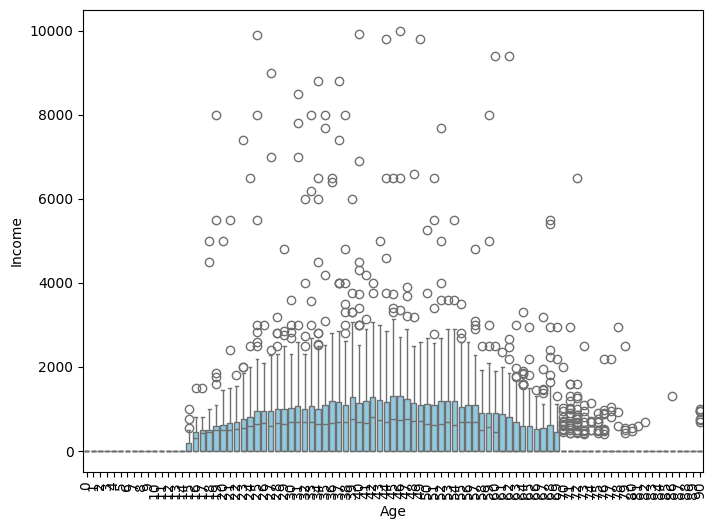

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train[(train['Age'] < 15) & (train['Income'] > 0)]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income


### Working_Week (Yearly)

    일하는 시간이 적은데 소득이 큰 경우
    0시간 일하는데 소득이 있는 경우

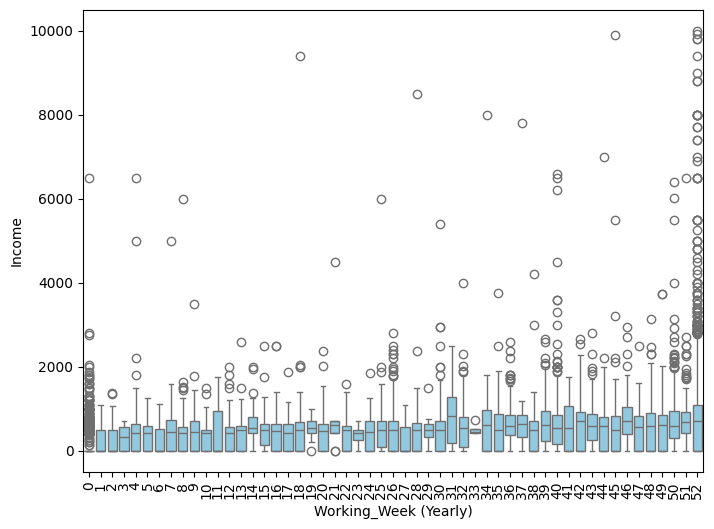

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Working_Week (Yearly)', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train[(train['Working_Week (Yearly)'] == 0) & (train['Income'] > 0)]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
169,TRAIN_00169,27,F,High graduate,Full-Time,0,Retail,Sales,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,600
212,TRAIN_00212,17,M,High Senior,Full-Time,0,Personal Services (except Private Household),Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,300,Under Median,425
242,TRAIN_00242,33,M,High graduate,Children or Armed Forces,0,Manufacturing (Durable),Transportation,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,1735
335,TRAIN_00335,21,M,College,Children or Armed Forces,0,Retail,Handlers/Cleaners,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,400
362,TRAIN_00362,28,F,High graduate,Choice Part-Time,0,Manufacturing (Non-durable),Handlers/Cleaners,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19522,TRAIN_19522,46,F,Associates degree (Vocational),Children or Armed Forces,0,Business & Repair,Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,10000,Over Median,675
19586,TRAIN_19586,22,M,Kindergarten,Children or Armed Forces,0,Manufacturing (Durable),Craft & Repair,White,Mexican (Mexicano),...,Foreign-born (Non-US Citizen),Mexico,Mexico,Mexico,Nonfiler,0,0,0,Under Median,500
19656,TRAIN_19656,52,F,Bachelors degree,Children or Armed Forces,0,Communications,Sales,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,650
19750,TRAIN_19750,39,F,High graduate,Children or Armed Forces,0,Private Household Services,Private Household Services,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,450


### Education_Status

In [ ]:
train['Education_Status'].value_counts()

High graduate                     6494
College                           3794
Children                          2208
Bachelors degree                  1956
High Junior                        820
High Sophomore                     799
Associates degree (Vocational)     741
Associates degree (Academic)       609
High Freshman                      555
Middle (7-8)                       548
Masters degree                     505
Elementary (5-6)                   317
High Senior                        242
Elementary (1-4)                   150
Professional degree                111
Doctorate degree                    87
Kindergarten                        64
Name: Education_Status, dtype: int64

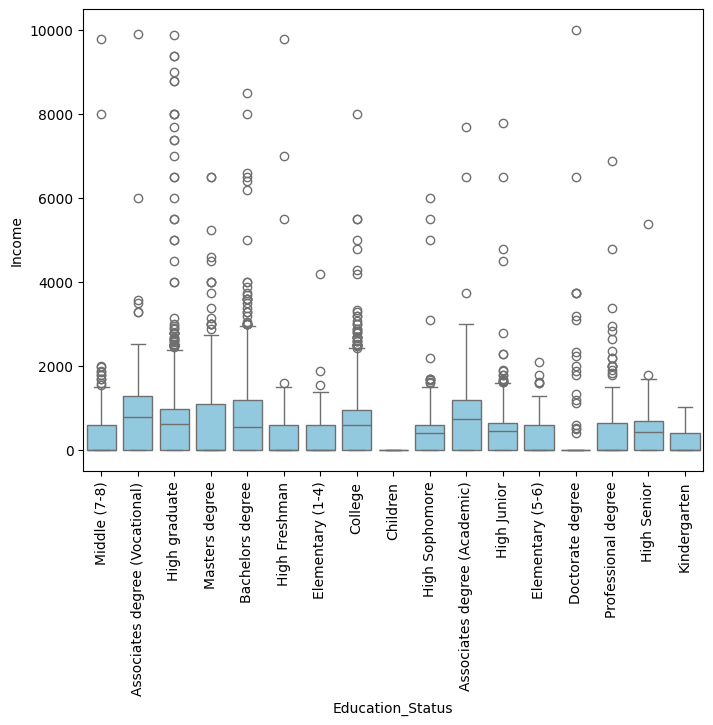

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education_Status', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train[(train['Education_Status'] == 'Children') & (train['Income'] > 0)]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income


### Employment_Status

    train['Employment_Status'] == 'Not working' > train['Income'] == 0

In [ ]:
train['Employment_Status'].value_counts()

Children or Armed Forces         11142
Full-Time                         6588
Not Working                       1221
Choice Part-Time                   593
Part-Time (Usually Part-Time)      158
Seeking Full-Time                  121
Part-Time (Usually Full-Time)      100
Seeking Part-Time                   77
Name: Employment_Status, dtype: int64

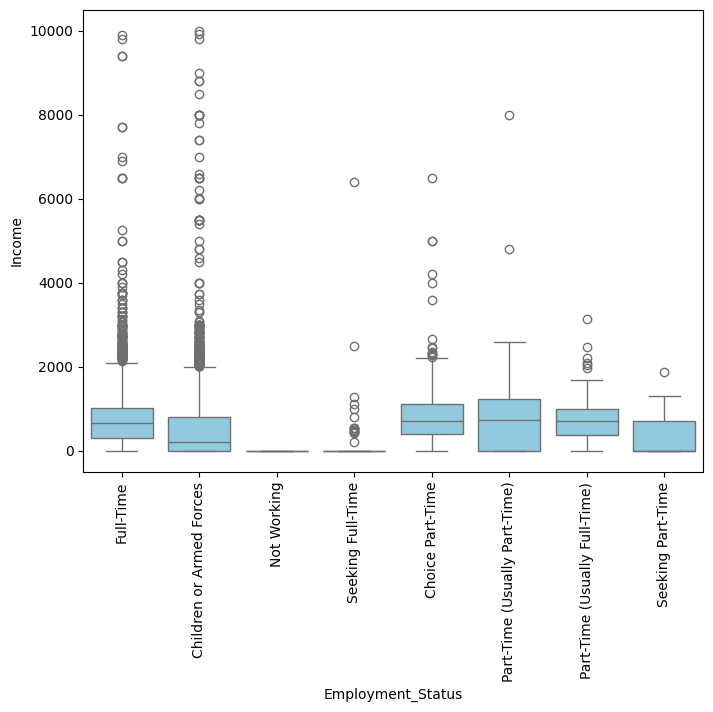

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Employment_Status', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train[(train['Employment_Status'] == 'Not working') & (train['Income'] > 0)]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income


### Industry_Status

    train['Industry_Status'] in ('Not in universe or children', 'Armed Forces') > train['Income'] == 0

In [ ]:
train['Industry_Status'].value_counts()

Not in universe or children                     4688
Retail                                          3149
Manufacturing (Durable)                         1575
Manufacturing (Non-durable)                     1223
Education                                       1041
Business & Repair                                847
Medical (except Hospitals)                       838
Construction                                     832
Hospitals                                        821
Finance Insurance & Real Estate                  727
Transportation                                   693
Public Administration                            641
Other professional services                      477
Wholesale                                        450
Personal Services (except Private Household)     429
Social Services                                  367
Entertainment                                    278
Agriculture                                      268
Utilities & Sanitary                          

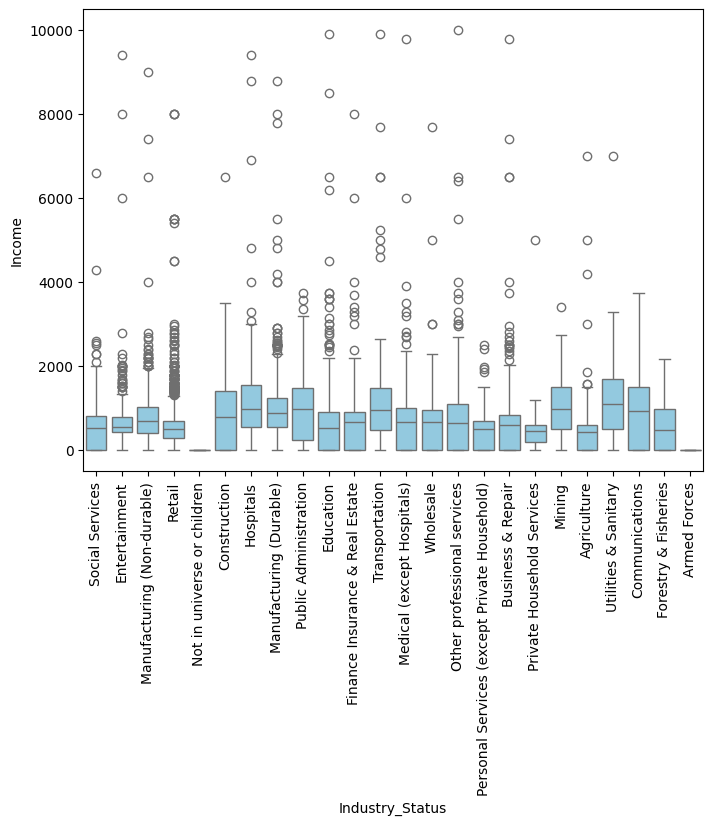

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Industry_Status', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train[(train['Industry_Status'] == 'Armed Forces') & (train['Income'] > 0)]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income


In [ ]:
train[(train['Industry_Status'] == 'Not in universe or children') & (train['Income'] > 0)]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income


### Occupation_Status

    train['Occupation_Status'] in ('Unknown', 'Armed Forces') > train['Income'] == 0

In [ ]:
train['Occupation_Status'].value_counts()

Unknown                             4688
Admin Support (include Clerical)    2709
Services                            2313
Craft & Repair                      1869
Sales                               1692
Professional                        1488
Machine Operators & Inspectors      1383
Management                          1111
Handlers/Cleaners                    837
Transportation                       690
Technicians & Support                558
Farming & Forestry & Fishing         296
Protective Services                  260
Private Household Services           105
Armed Forces                           1
Name: Occupation_Status, dtype: int64

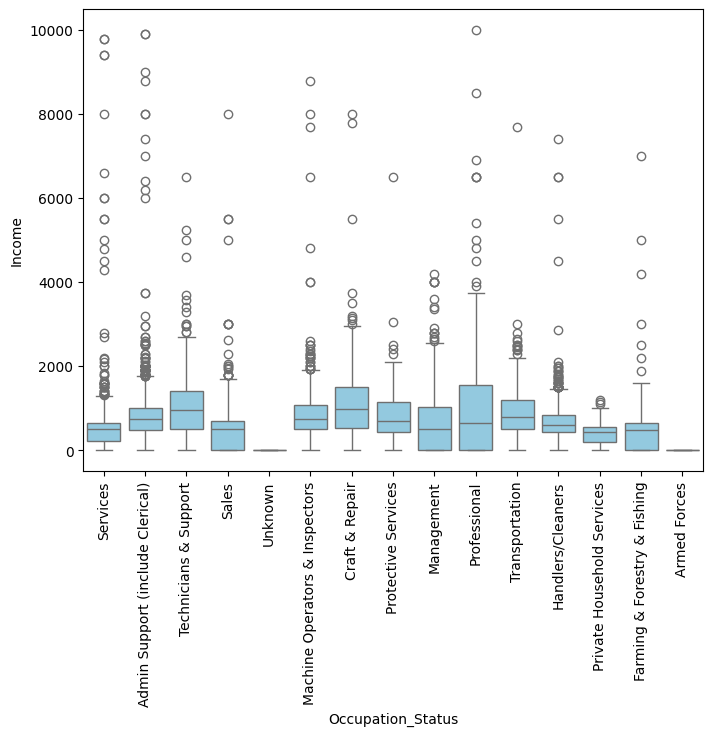

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Occupation_Status', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train[(train['Occupation_Status'] == 'Unknown') & (train['Income'] > 0)]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income


### Race

In [ ]:
train['Race'].value_counts()

White                           16845
Black                            2122
Asian/Pacific                     511
Other                             296
Native American/Aleut/Eskimo      226
Name: Race, dtype: int64

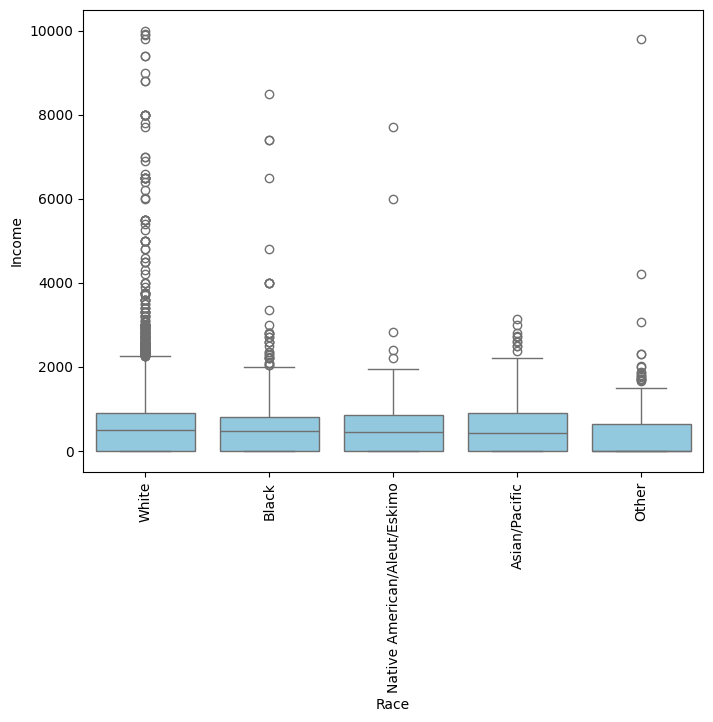

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Race', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

### Hispanic_Origin

    NA + Do not know

In [ ]:
train['Hispanic_Origin'].value_counts()

 All other                    17769
 Mexican-American               654
 Mexican (Mexicano)             624
 Central or South American      325
 Puerto Rican                   243
 Other Spanish                  201
 Cuban                           76
 NA                              59
 Chicano                         27
 Do not know                     22
Name: Hispanic_Origin, dtype: int64

In [ ]:
train['Hispanic_Origin'].unique()

array([' All other', ' Cuban', ' Mexican (Mexicano)',
       ' Central or South American', ' Puerto Rican', ' Mexican-American',
       ' Other Spanish', ' Do not know', ' Chicano', ' NA'], dtype=object)

In [ ]:
test['Hispanic_Origin'].unique()

array([' All other', ' Other Spanish', ' Mexican-American',
       ' Central or South American', ' Mexican (Mexicano)',
       ' Puerto Rican', ' NA', ' Cuban', ' Do not know', ' Chicano'],
      dtype=object)

In [ ]:
train['Hispanic_Origin'] = train['Hispanic_Origin'].str.strip()
test['Hispanic_Origin'] = test['Hispanic_Origin'].str.strip()

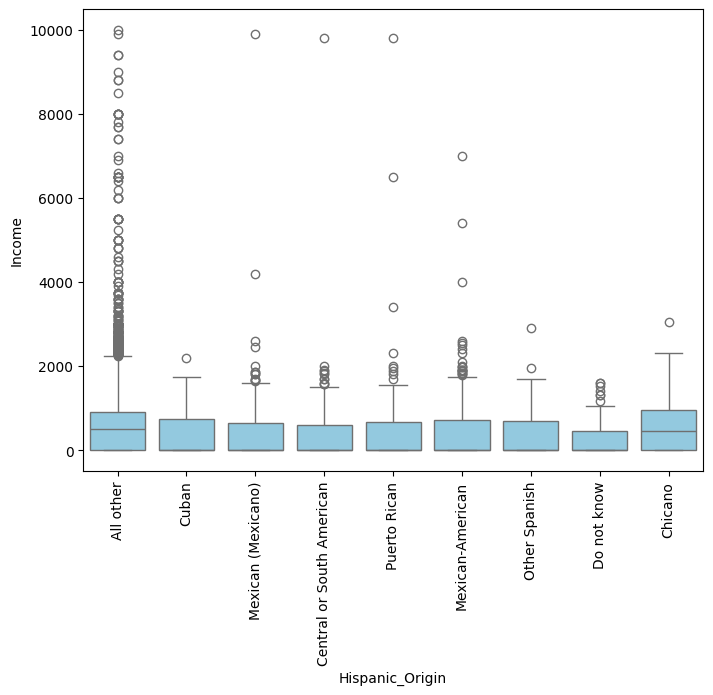

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Hispanic_Origin', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train['Hispanic_Origin'] = train['Hispanic_Origin'].replace('NA', 'Do not know')

In [ ]:
test['Hispanic_Origin'] = test['Hispanic_Origin'].replace('NA', 'Do not know')

In [ ]:
train['Hispanic_Origin'].value_counts()

All other                    17769
Mexican-American               654
Mexican (Mexicano)             624
Central or South American      325
Puerto Rican                   243
Other Spanish                  201
Do not know                     81
Cuban                           76
Chicano                         27
Name: Hispanic_Origin, dtype: int64

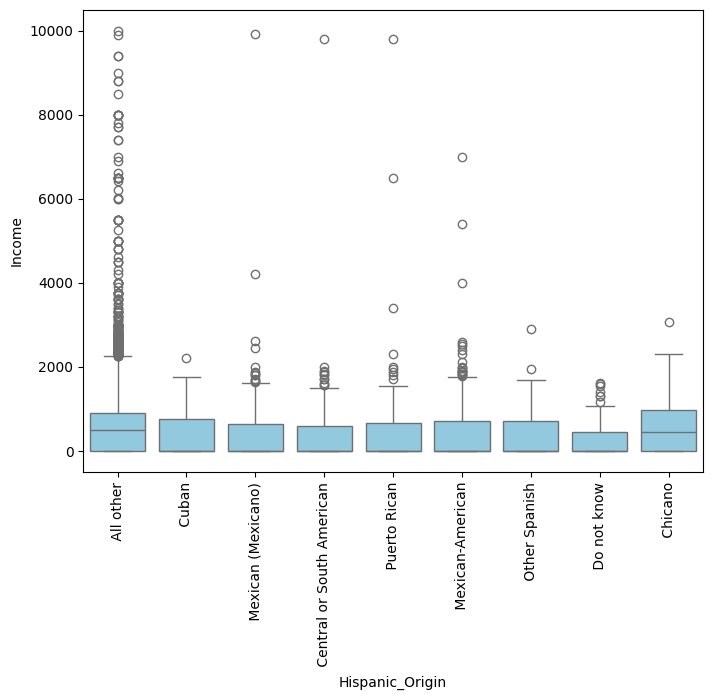

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Hispanic_Origin', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

### Martial_Status

In [ ]:
train['Martial_Status'].value_counts()

Married                         9554
Single                          7380
Divorced                        1633
Widowed                          756
Separated                        436
Married (Spouse Absent)          171
Married (Armed Force Spouse)      70
Name: Martial_Status, dtype: int64

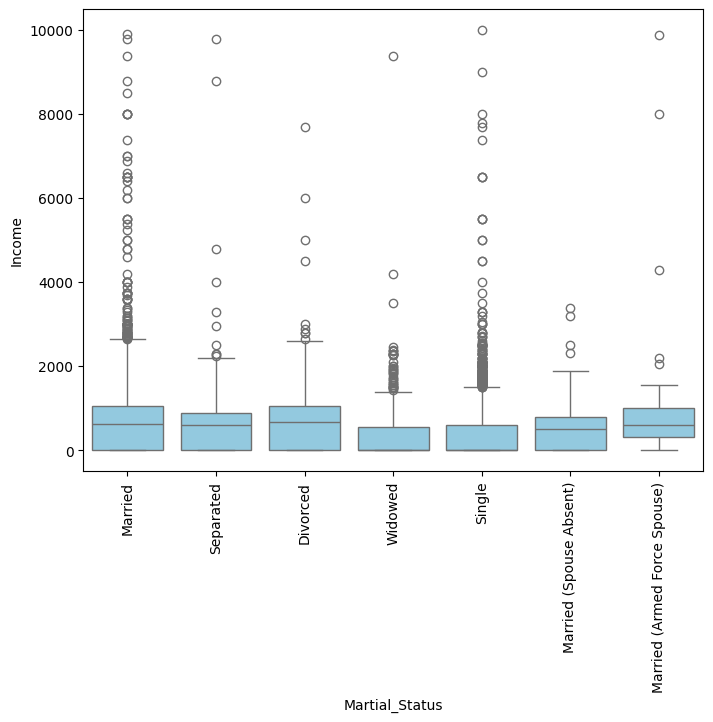

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Martial_Status', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

### Household_Status
    범주 축소

In [ ]:
train['Household_Status'].value_counts()

Householder                                                               6087
Spouse of householder                                                     4794
Child <18 never marr not in subfamily                                     2670
Nonfamily householder                                                     2465
Child 18+ never marr Not in a subfamily                                   1860
Secondary individual                                                       845
Other Rel 18+ never marr not in subfamily                                  195
Other Rel 18+ ever marr not in subfamily                                   154
Child 18+ ever marr Not in a subfamily                                     118
Child 18+ ever married Responsible Person of subfamily                     101
Child 18+ never married Responsible Person of subfamily                     96
Grandchild <18 never married child of subfamily Responsible Person          88
Responsible Person of unrelated subfamily           

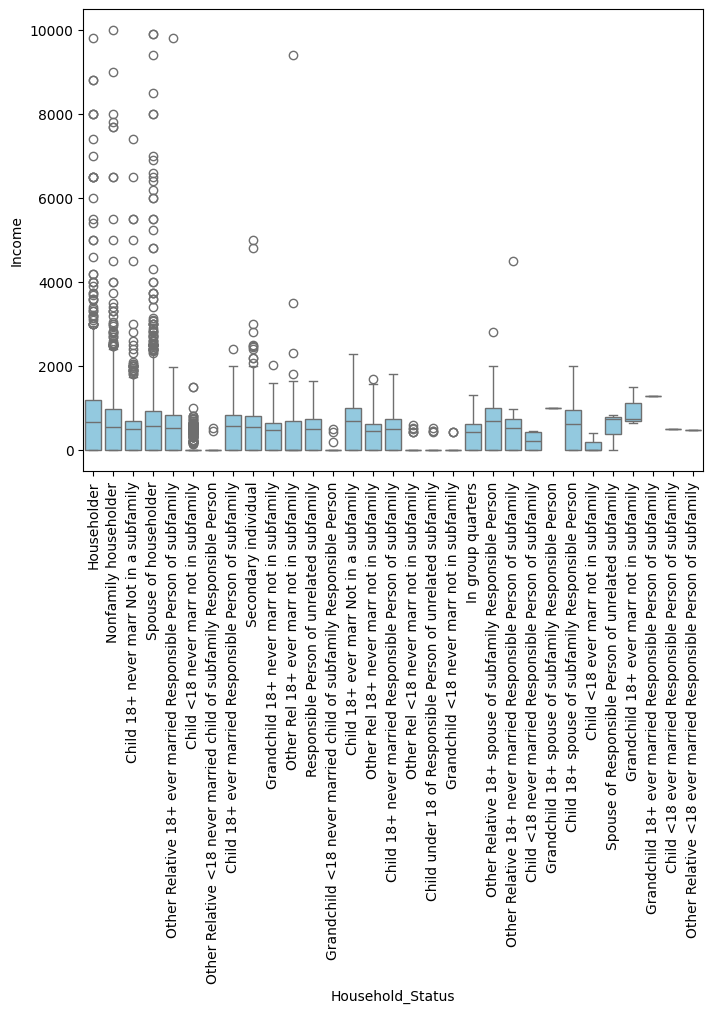

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Household_Status', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train['Household_Status'].unique()

array(['Householder', 'Nonfamily householder',
       'Child 18+ never marr Not in a subfamily', 'Spouse of householder',
       'Other Relative 18+ ever married Responsible Person of subfamily',
       'Child <18 never marr not in subfamily',
       'Other Relative <18 never married child of subfamily Responsible Person',
       'Child 18+ ever married Responsible Person of subfamily',
       'Secondary individual',
       'Grandchild 18+ never marr not in subfamily',
       'Other Rel 18+ ever marr not in subfamily',
       'Responsible Person of unrelated subfamily',
       'Grandchild <18 never married child of subfamily Responsible Person',
       'Child 18+ ever marr Not in a subfamily',
       'Other Rel 18+ never marr not in subfamily',
       'Child 18+ never married Responsible Person of subfamily',
       'Other Rel <18 never marr not in subfamily',
       'Child under 18 of Responsible Person of unrelated subfamily',
       'Grandchild <18 never marr not in subfamily', 'In 

### Household_Summary

In [ ]:
train['Household_Summary'].value_counts()

Householder                             8552
Spouse of householder                   4794
Child under 18 never married            2679
Child 18 or older                       2192
Nonrelative of householder               974
Other relative of householder            781
Group Quarters- Secondary individual      24
Child under 18 ever married                4
Name: Household_Summary, dtype: int64

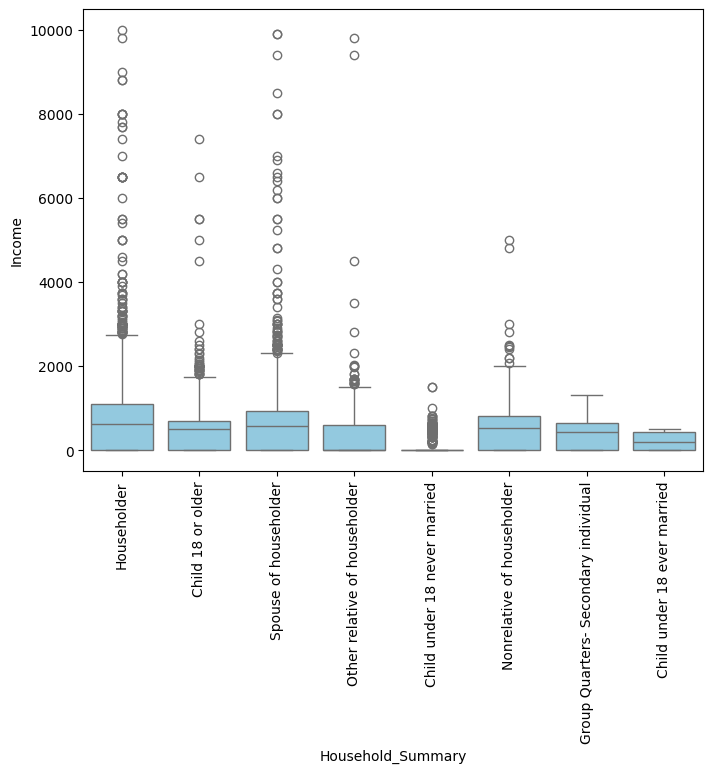

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Household_Summary', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

### Citizenship

In [ ]:
train['Citizenship'].value_counts()

Native                                         17825
Foreign-born (Non-US Citizen)                   1258
Foreign-born (Naturalized US Citizen)            588
Native (Born Abroad)                             197
Native (Born in Puerto Rico or US Outlying)      132
Name: Citizenship, dtype: int64

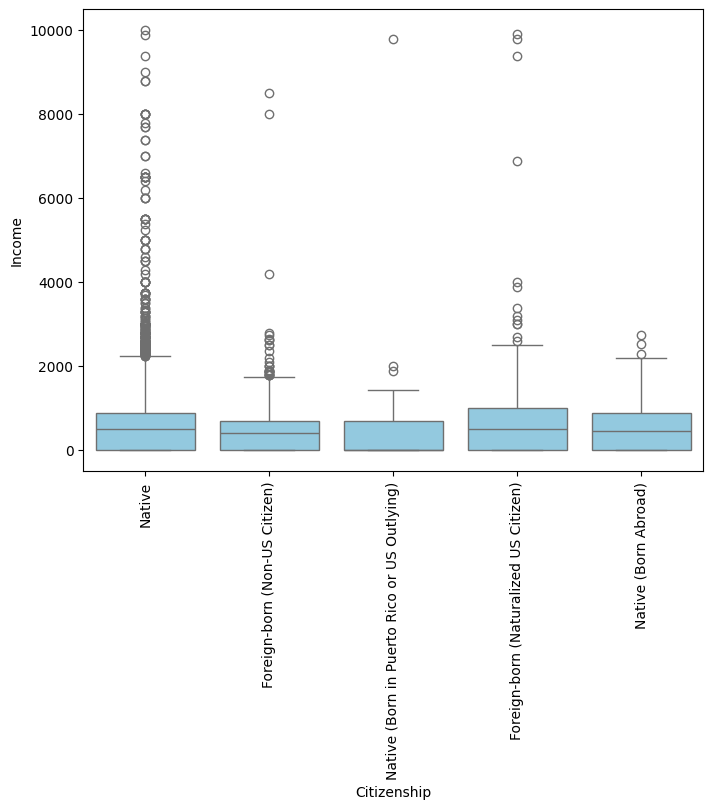

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Citizenship', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

### Birth_Country

    train['Birth_Country'] == 'Panama' > train['Income'] == 0

In [ ]:
train['Birth_Country'].value_counts()

US                              17825
Mexico                            540
Unknown                           330
Puerto-Rico                       117
Philippines                       112
Germany                            90
Canada                             75
El-Salvador                        68
Cuba                               58
India                              55
Dominican-Republic                 49
England                            47
Poland                             45
Jamaica                            45
Columbia                           36
Italy                              35
South Korea                        31
Vietnam                            31
Ecuador                            31
Japan                              30
Portugal                           29
Nicaragua                          28
China                              28
Guatemala                          28
Haiti                              25
Iran                               24
Peru        

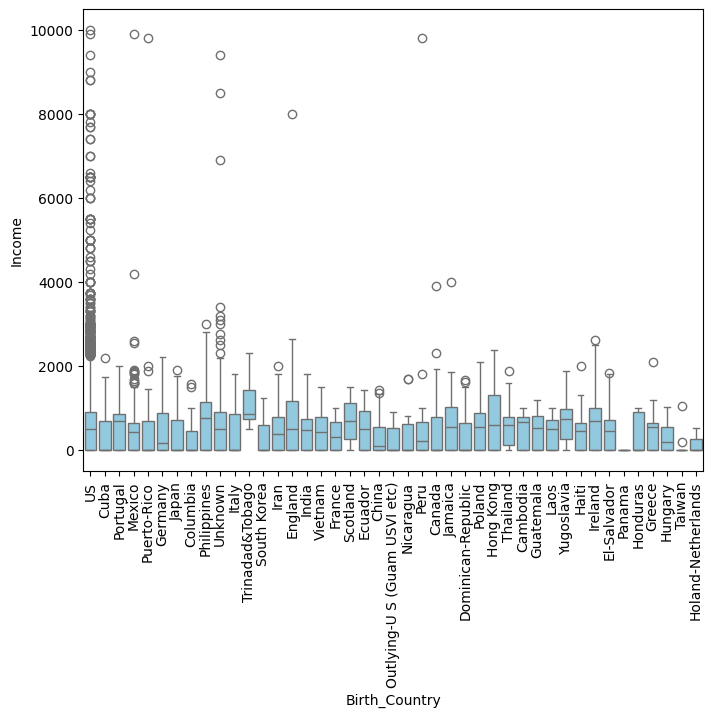

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Birth_Country', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train[(train['Birth_Country'] == 'Panama') & (train['Income'] > 0)]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income


### Birth_Country (Father)

In [ ]:
train['Birth_Country (Father)'].value_counts()

US                              16563
Mexico                            845
Unknown                           581
Puerto-Rico                       206
Italy                             197
Canada                            128
Philippines                       121
Poland                            110
Dominican-Republic                 99
Germany                            92
El-Salvador                        83
Cuba                               78
England                            69
China                              69
India                              68
Jamaica                            56
Ireland                            47
Portugal                           47
Columbia                           45
Ecuador                            42
Haiti                              37
South Korea                        34
Guatemala                          33
Greece                             33
Vietnam                            32
Nicaragua                          30
Japan       

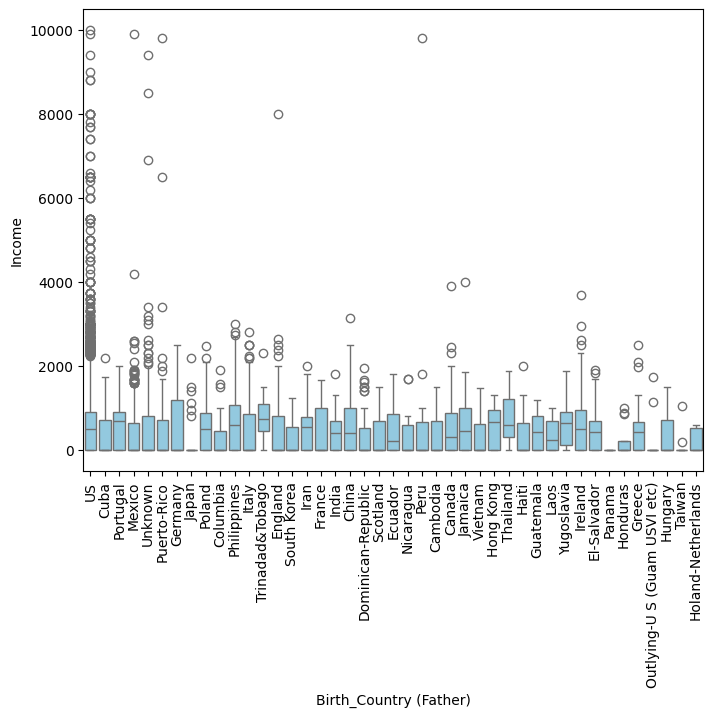

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Birth_Country (Father)', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

### Birth_Country (Mother)

In [ ]:
train['Birth_Country (Mother)'].value_counts()

US                              16594
Mexico                            849
Unknown                           517
Puerto-Rico                       194
Canada                            159
Italy                             152
Philippines                       128
Germany                           117
Poland                            104
El-Salvador                        99
England                            88
Dominican-Republic                 75
Cuba                               73
India                              67
China                              60
Ireland                            58
Jamaica                            56
Columbia                           45
Ecuador                            44
Portugal                           44
South Korea                        41
Vietnam                            39
Japan                              37
Guatemala                          36
Nicaragua                          35
Haiti                              34
Peru        

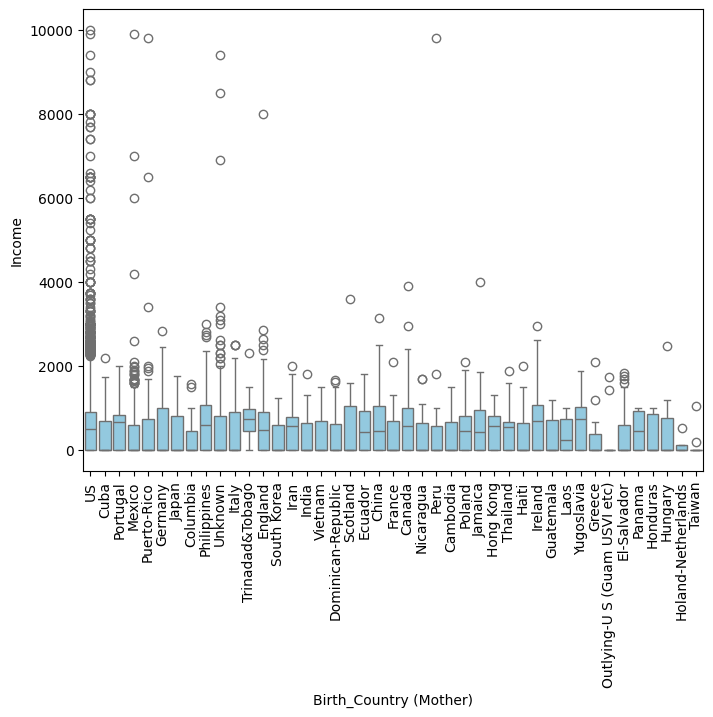

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Birth_Country (Mother)', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

### Tax_Status

In [ ]:
train['Tax_Status'].value_counts()

Married Filling Jointly both under 65 (MFJ)                 8588
Single                                                      5547
Nonfiler                                                    3874
Head of Household (HOH)                                     1217
Married Filling Jointly both over 65 (MFJ)                   469
Married Filling Jointly one over 65 & one under 65 (MFJ)     305
Name: Tax_Status, dtype: int64

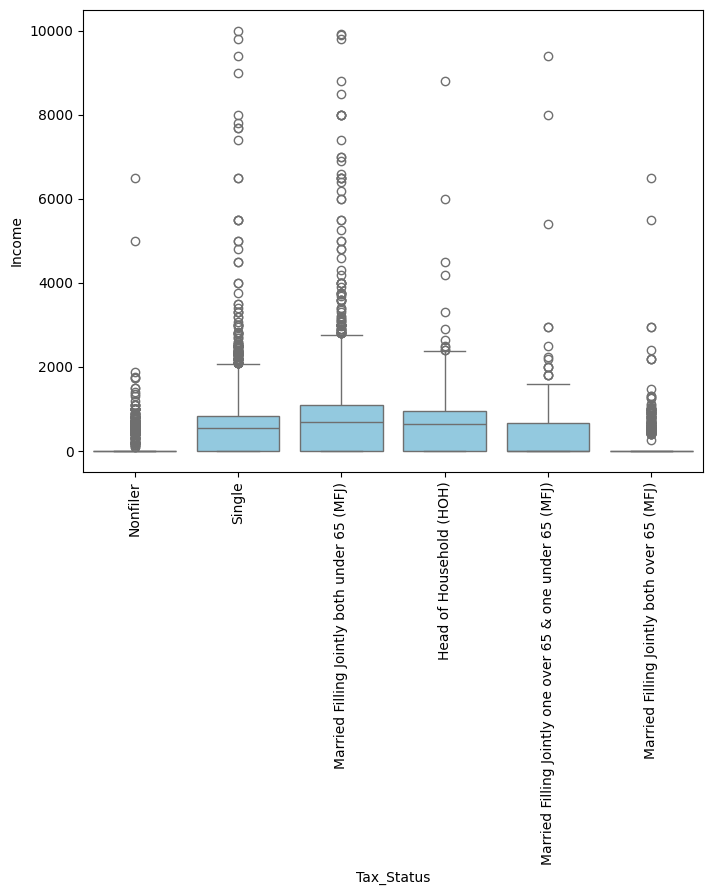

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tax_Status', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

### Income_Status

In [ ]:
train['Income_Status'].value_counts()

Under Median    13237
Unknown          6026
Over Median       737
Name: Income_Status, dtype: int64

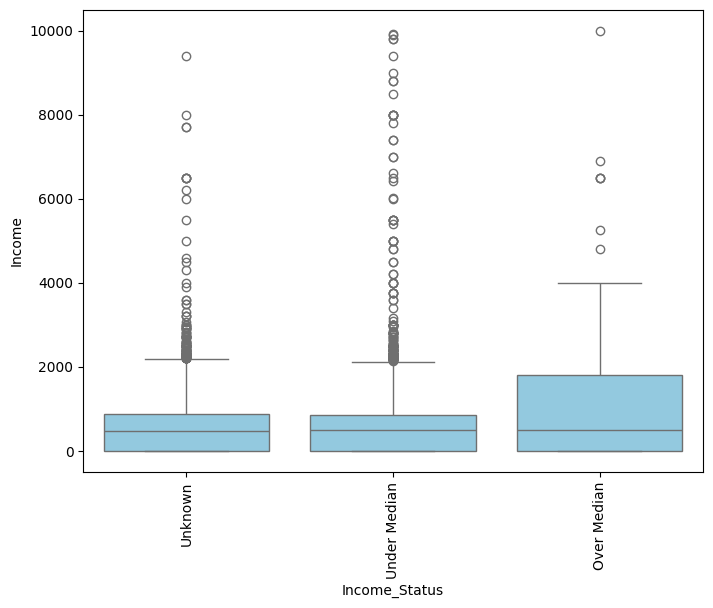

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Income_Status', y='Income', data=train, color='skyblue')
plt.xticks(rotation=90)
plt.show()

## Correlation

In [ ]:
new_train = train.drop(columns=['ID'])
new_test = test.drop(columns=['ID'])

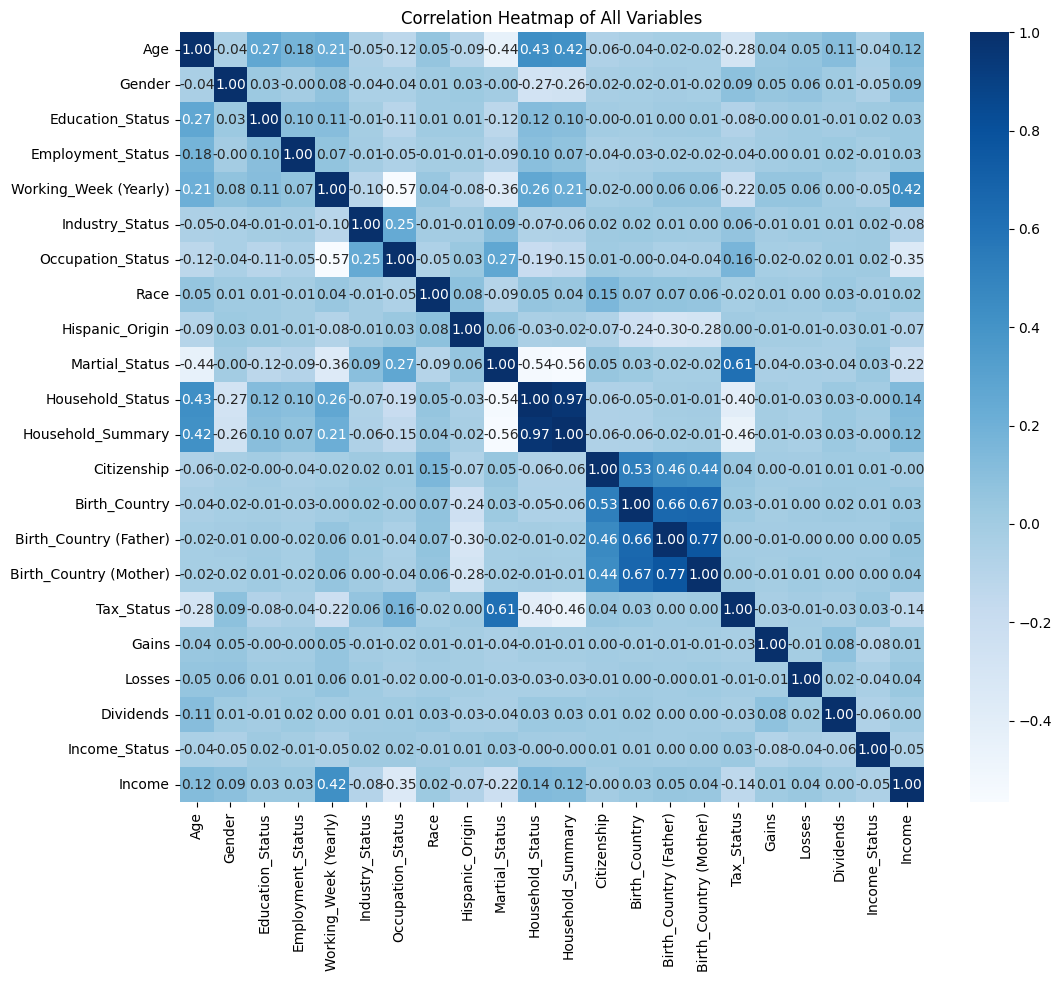

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoding_target = list(new_train.dtypes[new_train.dtypes == "object"].index)
le = LabelEncoder()

for i in encoding_target:
    le.fit(new_train[i])
    new_train[i] = le.transform(new_train[i])
    new_test[i] = le.transform(new_test[i])

correlation_matrix = new_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap of All Variables')
plt.show()


In [ ]:
new_train.to_csv('new_train.csv', index=False)
new_test.to_csv('new_test.csv', index=False)

## Visualization

In [ ]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

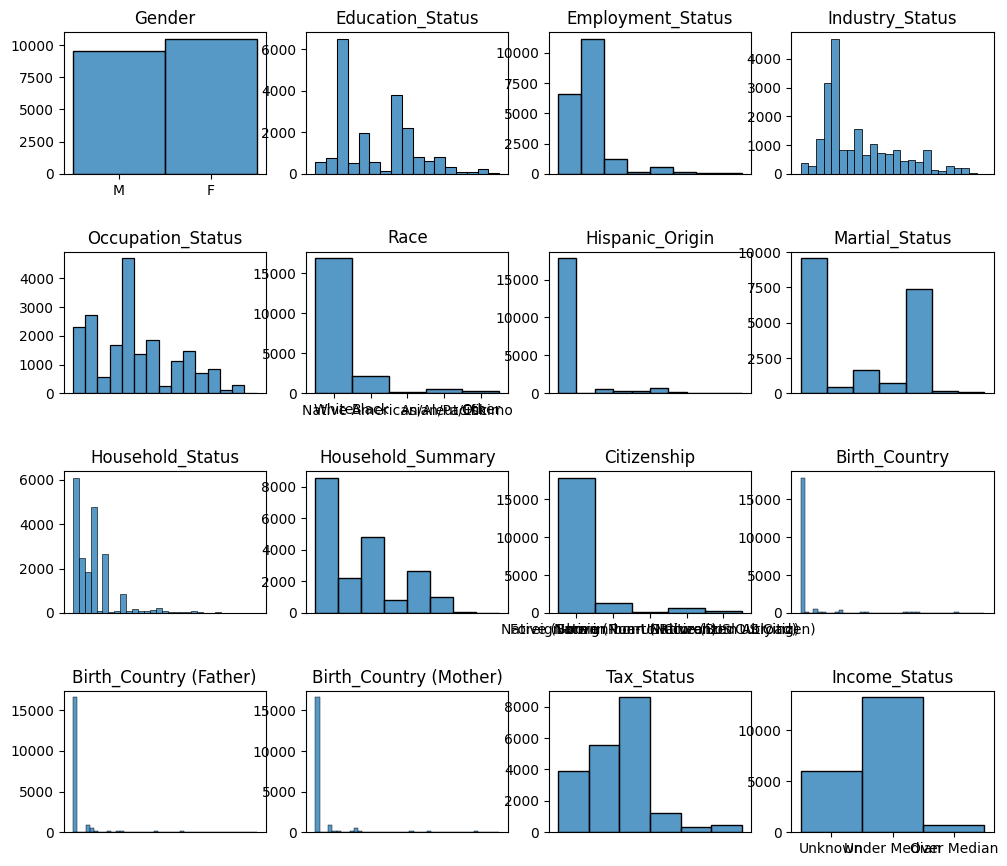

In [ ]:
col = ['Gender', 'Education_Status', 'Employment_Status',
       'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status', 'Income_Status']


plt.figure(figsize=(12, 10))

for i in range(len(col)):
    plt.subplot(4, 4, i+1)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.55)
    plt.title(col[i])
    sns.histplot(train[col[i]])
    plt.title(col[i])
    plt.xlabel(None)
    plt.ylabel(None)
    if train[col[i]].nunique() > 5:
        plt.xticks([])
plt.show()

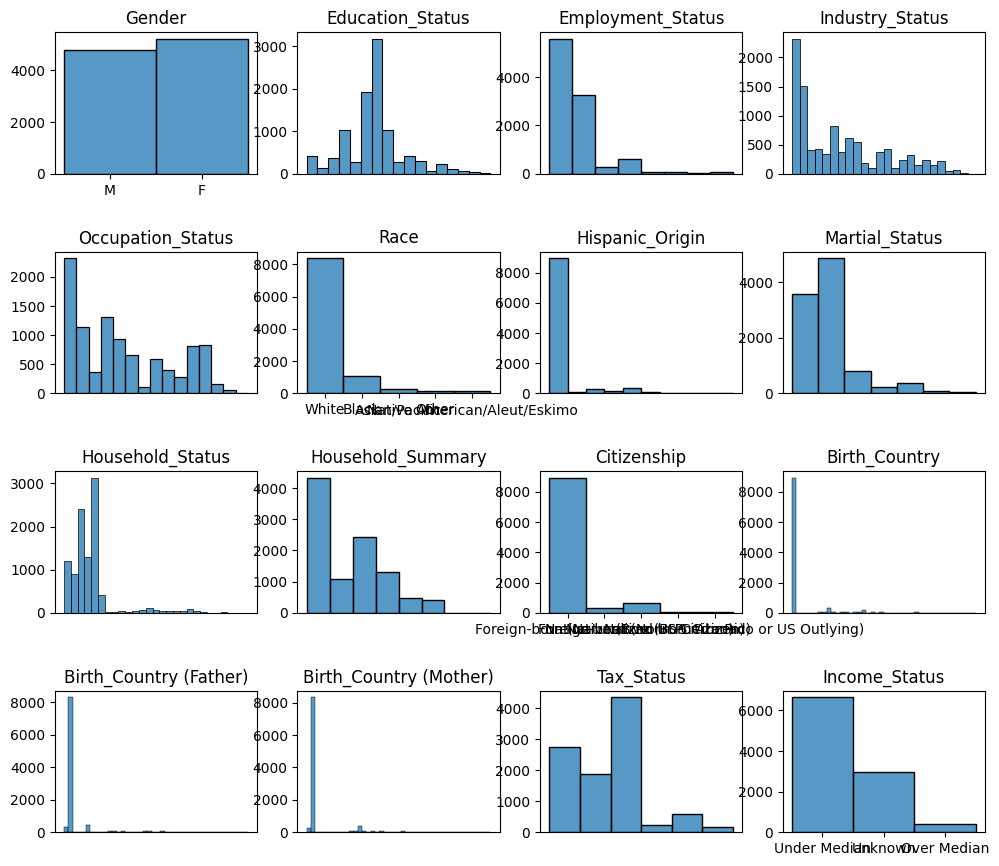

In [ ]:
col = ['Gender', 'Education_Status', 'Employment_Status',
       'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status', 'Income_Status']


plt.figure(figsize=(12, 10))

for i in range(len(col)):
    plt.subplot(4, 4, i+1)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.55)
    plt.title(col[i])
    sns.histplot(test[col[i]])
    plt.title(col[i])
    plt.xlabel(None)
    plt.ylabel(None)
    if test[col[i]].nunique() > 5:
        plt.xticks([])
plt.show()

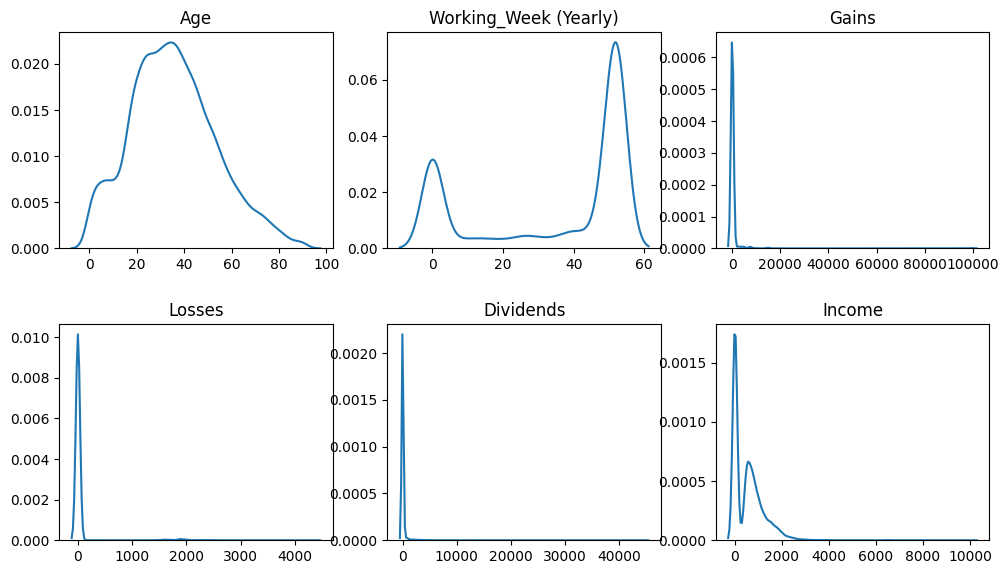

In [ ]:
col = ['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends', 'Income']

plt.figure(figsize=(12, 10))

for i in range(len(col)):
    plt.subplot(3, 3, i+1, )
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    plt.title(col[i])
    sns.kdeplot(train[col[i]])
    plt.title(col[i])
    plt.xlabel(None)
    plt.ylabel(None)
plt.show()

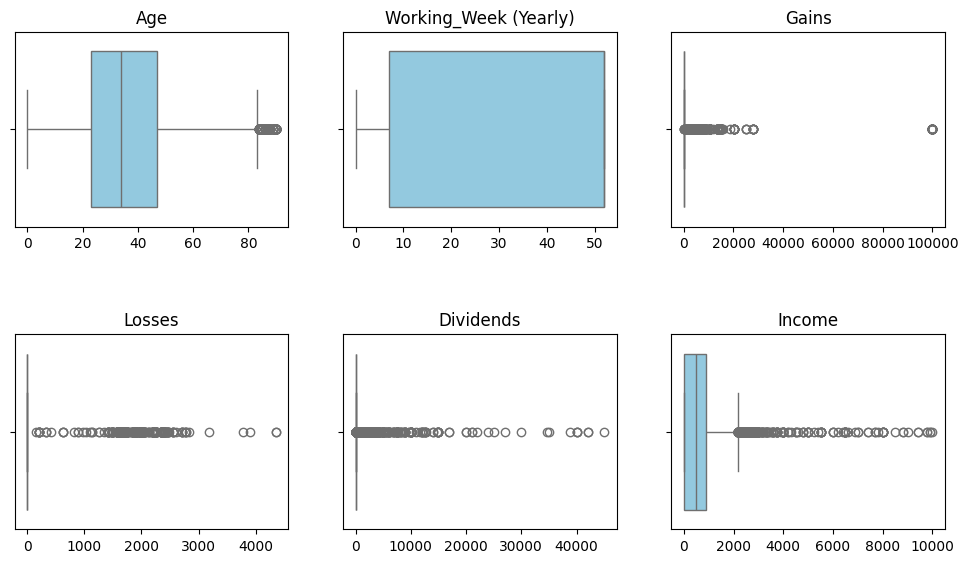

In [ ]:
col = ['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends', 'Income']

plt.figure(figsize=(12, 10))

for i in range(len(col)):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.55)
    plt.title(col[i])
    sns.boxplot(x=train[col[i]], color='skyblue')
    plt.title(col[i])
    plt.xlabel(None)
    plt.ylabel(None)
plt.show()

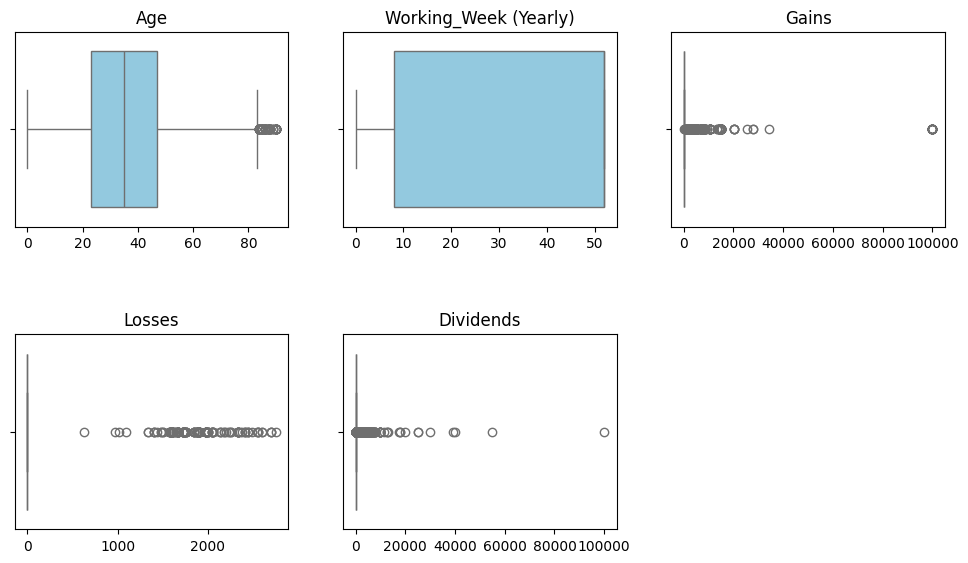

In [ ]:
col = ['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends']

plt.figure(figsize=(12, 10))

for i in range(len(col)):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.55)
    plt.title(col[i])
    sns.boxplot(x=test[col[i]], color='skyblue')
    plt.title(col[i])
    plt.xlabel(None)
    plt.ylabel(None)
plt.show()

## DecisionTree

In [ ]:
train_x = train.drop(columns=['ID', 'Income'])
train_y = train['Income']

test_x = test.drop(columns=['ID'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoding_target = list(train_x.dtypes[train_x.dtypes == "object"].index)

for i in encoding_target:
    le = LabelEncoder()

    train_x[i] = train_x[i].astype(str)
    test_x[i] = test_x[i].astype(str)

    le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])

    for case in np.unique(test_x[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)

    test_x[i] = le.transform(test_x[i])

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(train_x, train_y)

DecisionTreeRegressor()

In [ ]:
preds = model.predict(test_x)

In [ ]:
submission = pd.read_csv('./sample_submission.csv')
submission['Income'] = preds
submission

,ID,Income
0,TEST_0000,0.0
1,TEST_0001,0.0
2,TEST_0002,500.0
3,TEST_0003,0.0
4,TEST_0004,0.0
...,...,...
9995,TEST_9995,1300.0
9996,TEST_9996,700.0
9997,TEST_9997,425.0
9998,TEST_9998,0.0


In [ ]:
submission.to_csv('./baseline_submission.csv', index=False)

## Catboost

In [ ]:
col = ['Gender', 'Education_Status', 'Employment_Status',
       'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status', 'Income_Status']

for i in col:
    train[i] = train[i].astype('category')
    test[i] = test[i].astype('category')

In [ ]:
from catboost import CatBoostRegressor, Pool

x_train = train.drop(['ID', 'Income'], axis=1)
x_test = test.drop(['ID'], axis=1)
y_train = train['Income']
train_pool = Pool(data=x_train, label=y_train, cat_features=col)

In [ ]:
clf = CatBoostRegressor(random_state=42, verbose=100)
clf.fit(train_pool)

Learning rate set to 0.065727
0:	learn: 691.0376612	total: 50.4ms	remaining: 50.4s
100:	learn: 585.1885969	total: 6.21s	remaining: 55.2s
200:	learn: 578.8198544	total: 14.5s	remaining: 57.7s
300:	learn: 572.6212097	total: 20.8s	remaining: 48.2s
400:	learn: 566.3089345	total: 28s	remaining: 41.8s
500:	learn: 561.7168004	total: 33.7s	remaining: 33.5s
600:	learn: 557.0305814	total: 41s	remaining: 27.2s
700:	learn: 552.1035116	total: 46.9s	remaining: 20s
800:	learn: 548.0780018	total: 54.3s	remaining: 13.5s
900:	learn: 544.6742114	total: 1m	remaining: 6.6s
999:	learn: 541.9223162	total: 1m 7s	remaining: 0us


In [ ]:
test_pool = Pool(data=x_test, cat_features=col)
pred = clf.predict(test_pool)
pred = [0 if i < 0 else i for i in pred]

In [ ]:
df_submit = pd.read_csv('sample_submission.csv')
df_submit['Income'] = pred
df_submit.loc[x_test['Employment_Status'] == 'Not working', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Not in universe or children', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Unknown', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Birth_Country'] == 'Panama', 'Income'] = 0
df_submit.loc[x_test['Age'] < 15, 'Income'] = 0
df_submit.to_csv("catboost_submission4.csv", index=False)

In [ ]:
col = ['Gender', 'Education_Status', 'Employment_Status', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship', 'Birth_Country', 'Tax_Status', 'Income_Status']

x_train = train.drop(['ID', 'Income', 'Household_Status', 'Birth_Country (Father)', 'Birth_Country (Mother)'], axis=1)
x_test = test.drop(['ID', 'Household_Status', 'Birth_Country (Father)', 'Birth_Country (Mother)'], axis=1)
y_train = train['Income']
train_pool = Pool(data=x_train, label=y_train, cat_features=col)

In [ ]:
clf = CatBoostRegressor(random_state=42, verbose=100)
clf.fit(train_pool)

Learning rate set to 0.065727
0:	learn: 690.8069685	total: 43ms	remaining: 43s
100:	learn: 585.8203134	total: 5.34s	remaining: 47.5s
200:	learn: 578.3669783	total: 13.4s	remaining: 53.2s
300:	learn: 573.0540263	total: 19.9s	remaining: 46.3s
400:	learn: 568.2240904	total: 25s	remaining: 37.3s
500:	learn: 562.7025592	total: 29.5s	remaining: 29.4s
600:	learn: 558.3878282	total: 35.6s	remaining: 23.6s
700:	learn: 555.1738206	total: 40.2s	remaining: 17.1s
800:	learn: 551.3181314	total: 45.1s	remaining: 11.2s
900:	learn: 548.0850755	total: 51s	remaining: 5.6s
999:	learn: 544.5805366	total: 55.5s	remaining: 0us


In [ ]:
test_pool = Pool(data=x_test, cat_features=col)
pred = clf.predict(test_pool)
pred = [0 if i < 0 else i for i in pred]

In [ ]:
df_submit = pd.read_csv('sample_submission.csv')
df_submit['Income'] = pred
df_submit.loc[x_test['Employment_Status'] == 'Not working', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Not in universe or children', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Unknown', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Birth_Country'] == 'Panama', 'Income'] = 0
df_submit.loc[x_test['Age'] < 15, 'Income'] = 0
df_submit.to_csv("catboost_submission5.csv", index=False)

In [ ]:
df_submit = pd.read_csv('catboost_submission2.csv')
df_submit.loc[x_test['Age'] < 15, 'Income'] = 0
df_submit.to_csv("catboost_submission6.csv", index=False)

## LightGBM

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

train_df = pd.read_csv('new_train.csv')
test_df = pd.read_csv('new_test.csv')

X = train_df.drop('Income', axis=1)
y = train_df['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9
}

model = lgb.train(params, train_data, num_boost_round=100)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


In [ ]:
pred = model.predict(test_df)
pred = [0 if i < 0 else i for i in pred]

In [ ]:
df_submit = pd.read_csv('sample_submission.csv')
df_submit['Income'] = pred
df_submit.loc[x_test['Employment_Status'] == 'Not working', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Not in universe or children', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Unknown', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Birth_Country'] == 'Panama', 'Income'] = 0
df_submit.to_csv("LGBM_submission.csv", index=False)

RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from scipy.stats import randint as sp_randint

param_dist = {
    'num_leaves': sp_randint(20, 50),
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': sp_randint(100, 500),
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

lgb_model = lgb.LGBMRegressor()

random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_dist,
                                   n_iter=10, scoring='neg_mean_squared_error', cv=5,
                                   verbose=1, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score (Negative MSE):", random_search.best_score_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 21
[LightGBM] [Info] Start training from score 556.153500
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'n_estimators': 291, 'num_leaves': 47, 'subsample': 0.8}
Best Score (Negative MSE): -354809.3119037362
Mean Squared Error on Test Set: 347469.6604774094


In [ ]:
pred = best_model.predict(test_df)
pred = [0 if i < 0 else i for i in pred]

In [ ]:
df_submit = pd.read_csv('sample_submission.csv')
df_submit['Income'] = pred
df_submit.loc[x_test['Employment_Status'] == 'Not working', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Not in universe or children', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Unknown', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Birth_Country'] == 'Panama', 'Income'] = 0
df_submit.loc[x_test['Age'] < 15] = 0
df_submit.to_csv("LGBM_submission2.csv", index=False)

### StandardScaler

In [ ]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_train = train.drop(['ID'], axis=1)
scaler_test = test.drop(['ID'], axis=1)

features = ['Dividends', 'Losses', 'Gains']

scaler = StandardScaler()
scaler_train[features] = scaler.fit_transform(scaler_train[features])
scaler_test[features] = scaler.transform(scaler_test[features])

In [ ]:
col = ['Gender', 'Education_Status', 'Employment_Status',
       'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status', 'Income_Status']

for i in col:
    scaler_train[i] = scaler_train[i].astype('category')
    scaler_test[i] = scaler_test[i].astype('category')

In [ ]:
from catboost import CatBoostRegressor, Pool

x_train = scaler_train.drop(['Income'], axis=1)
x_test = scaler_test
y_train = scaler_train['Income']
train_pool = Pool(data=x_train, label=y_train, cat_features=col)

In [ ]:
clf = CatBoostRegressor(random_state=42, verbose=100)
clf.fit(train_pool)

Learning rate set to 0.065727
0:	learn: 691.0376612	total: 104ms	remaining: 1m 44s
100:	learn: 585.1885969	total: 7.15s	remaining: 1m 3s
200:	learn: 578.8198544	total: 18.4s	remaining: 1m 13s
300:	learn: 572.6212097	total: 29.8s	remaining: 1m 9s
400:	learn: 566.3089345	total: 38.8s	remaining: 58s
500:	learn: 561.7168004	total: 46.4s	remaining: 46.2s
600:	learn: 557.0305814	total: 52.2s	remaining: 34.7s
700:	learn: 552.1035116	total: 1m	remaining: 25.6s
800:	learn: 548.0780018	total: 1m 6s	remaining: 16.5s
900:	learn: 544.6742114	total: 1m 14s	remaining: 8.17s
999:	learn: 541.9223162	total: 1m 27s	remaining: 0us


In [ ]:
test_pool = Pool(data=x_test, cat_features=col)
pred = clf.predict(test_pool)
pred = [0 if i < 0 else i for i in pred]

In [ ]:
df_submit = pd.read_csv('sample_submission.csv')
df_submit['Income'] = pred

df_submit.loc[x_test['Employment_Status'] == 'Not working', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Not in universe or children', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Unknown', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Birth_Country'] == 'Panama', 'Income'] = 0
df_submit.loc[x_test['Age'] < 15, 'Income'] = 0

df_submit.to_csv("catboost_submission3.csv", index=False)

In [ ]:
train_df = pd.read_csv('new_train.csv')
test_df = pd.read_csv('new_test.csv')

features = ['Dividends', 'Losses', 'Gains']

scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

X = train_df.drop('Income', axis=1)
y = train_df['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9
}

model = lgb.train(params, train_data, num_boost_round=100)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 21
[LightGBM] [Info] Start training from score 556.153500
Mean Squared Error: 349178.7843424628


In [ ]:
pred = model.predict(test_df)
pred = [0 if i < 0 else i for i in pred]

In [ ]:
df_submit = pd.read_csv('sample_submission.csv')
df_submit['Income'] = pred
df_submit.loc[x_test['Employment_Status'] == 'Not working', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Not in universe or children', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Unknown', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Birth_Country'] == 'Panama', 'Income'] = 0
df_submit.loc[x_test['Age'] < 15, 'Income'] = 0

df_submit.to_csv("LGBM_submission3.csv", index=False)